## Plot position of the calibrator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_calibrator_list(ifile, fluxmin = 0.2): # copy from readCal
    
    listcal = []
    
    with open(ifile, 'r') as data:
        for line in data:
            if line[0] != "#":
                iline = line.split(",")
                name = iline[13].split("|")[0]
                alpha2000 = float(iline[3])
                delta2000 = float(iline[5])
                flux = float(iline[7])

                if flux >= fluxmin:
                    found = False
                    for nameYet in listcal:
                        if nameYet[0] == name:
                            found = True

                    if not found:
                        listcal.append([alpha2000, delta2000, flux])

    return(listcal)

Read the data

In [3]:
input_file = "/home/ridlo/project/ALMA/alma-calibrator/src/CalSept2015.list"

In [4]:
data = read_calibrator_list(input_file, fluxmin = 0.001) # change fluxmin

In [5]:
data_np = np.array(data)
ra, dec, flux = data_np[:,0], data_np[:,1], data_np[:,2]

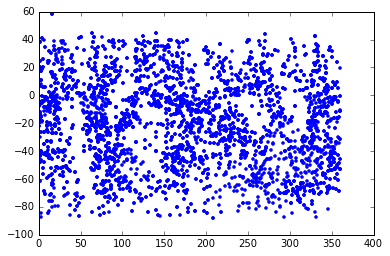

In [6]:
%matplotlib inline
plt.plot(ra, dec, 'b.')

Note: ALMA located at 23.0278° S, 67.7548° W

### Using flux density as color

In [7]:
import matplotlib.cm as cm

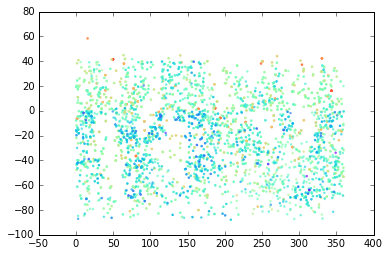

In [8]:
flux_log = np.log(flux)
max_flux = flux_log.max()
cmap = plt.cm.rainbow
color = flux_log/max_flux
plt.scatter(ra, dec, c=color, s=6, lw=0, alpha=0.7, cmap=cmap)

### Map projection plot
#### Equatorial coordinate

In [9]:
from mpl_toolkits.basemap import Basemap

In [10]:
m = Basemap(projection='moll', lon_0=0) # center at 'longitude' 0

Shift range[-180, 180]

In [11]:
def shift180pm(alpha):
    res = []
    for a in alpha:
        if a > 180:
            res.append(a - 360)
        else:
            res.append(a)
    
    return(res)

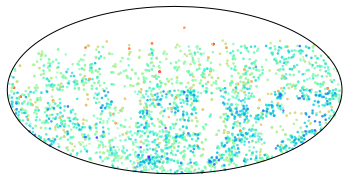

In [12]:
ra_shift = shift180pm(ra) # shift ra [-180, 180]
x, y = m(ra_shift, dec)
m.scatter(x, y, c=color, s=6, lw=0, alpha=0.7, cmap=cmap)

#### Galactic coordinate

In [13]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [14]:
equ = SkyCoord(ra, dec, frame='icrs', unit='deg')
gal = equ.galactic

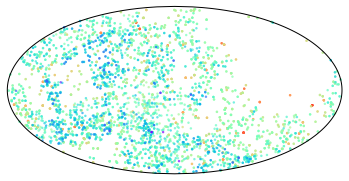

In [15]:
l_shift = shift180pm(gal.l.degree) # shift galactic longitude [-180, 180]
x, y = m(l_shift, gal.b.degree)
m.scatter(x, y, c=color, s=6, lw=0, alpha=0.7, cmap=cmap)